<a href="https://colab.research.google.com/github/EliraAkimbaeva/Supervised_ML/blob/main/Solubility_of_molecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About the project**
1.   Machine Learning type: Supervised
2.   Type(s) of models: Linear Regression, Random Forest



Import libraries

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Load the data

In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## About the data

In [ ]:
df.columns

Index(['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion', 'logS'], dtype='object')

In [ ]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [ ]:
df.tail()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790
1143,2.02164,179.219,1.0,0.461538,-2.581


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [ ]:
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


In [ ]:
df.shape

(1144, 5)

In [ ]:
df.loc[0]

MolLogP                 2.5954
MolWt                 167.8500
NumRotatableBonds       0.0000
AromaticProportion      0.0000
logS                   -2.1800
Name: 0, dtype: float64

In [ ]:
df.loc[1143]

MolLogP                 2.021640
MolWt                 179.219000
NumRotatableBonds       1.000000
AromaticProportion      0.461538
logS                   -2.581000
Name: 1143, dtype: float64

In [ ]:
df.loc[[0]]

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.85,0.0,0.0,-2.18


In [ ]:
df.loc[[1143]]

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
1143,2.02164,179.219,1.0,0.461538,-2.581


In [ ]:
df.to_string()

'       MolLogP    MolWt  NumRotatableBonds  AromaticProportion    logS\n0      2.59540  167.850                0.0            0.000000  -2.180\n1      2.37650  133.405                0.0            0.000000  -2.000\n2      2.59380  167.850                1.0            0.000000  -1.740\n3      2.02890  133.405                1.0            0.000000  -1.480\n4      2.91890  187.375                1.0            0.000000  -3.040\n5      1.81000   98.960                0.0            0.000000  -1.290\n6      1.93520   96.944                0.0            0.000000  -1.640\n7      1.40540  118.176                4.0            0.000000  -0.430\n8      4.30020  215.894                0.0            0.600000  -4.570\n9      2.56540  132.206                0.0            0.600000  -4.370\n10     4.30020  215.894                0.0            0.600000  -4.630\n11     3.64680  181.449                0.0            0.666667  -4.000\n12     2.61186  120.195                0.0            0.666667 

## Data Preprocessing

In [ ]:
df.isnull().sum()

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

In [6]:
df['MolLogP'].value_counts()

7.27400    7
1.41490    7
5.31380    6
1.94750    6
1.97250    5
          ..
2.29860    1
1.24510    1
1.36870    1
3.29690    1
2.02164    1
Name: MolLogP, Length: 930, dtype: int64

In [7]:
df.drop('MolLogP',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolWt               1144 non-null   float64
 1   NumRotatableBonds   1144 non-null   float64
 2   AromaticProportion  1144 non-null   float64
 3   logS                1144 non-null   float64
dtypes: float64(4)
memory usage: 35.9 KB


In [15]:
df['MolWt'].unique()

array([167.85 , 133.405, 187.375,  98.96 ,  96.944, 118.176, 215.894,
       132.206, 181.449, 120.195, 393.698, 134.222, 314.802, 110.112,
       235.906, 187.862, 147.004, 112.987, 170.92 , 168.108,  58.08 ,
       120.195, 213.105,  54.092, 147.004, 132.232, 114.094, 156.228,
        80.13 , 147.004, 156.228,  68.119,  82.146, 180.21 , 154.253,
       302.458, 194.237, 137.02 , 179.101, 165.074, 207.07 , 193.128,
       151.047, 122.993,  74.123,  56.108, 143.411,  92.569, 134.65 ,
       120.623, 162.619, 106.596,  78.542, 158.285, 140.27 , 186.339,
       116.204,  98.189,  96.173, 242.447, 102.177,  84.162, 100.161,
       184.02 , 226.101, 254.07 , 169.993,  96.173, 180.25 , 142.201,
       192.261, 126.115, 144.173, 143.189, 173.171,  89.094, 144.258,
       126.243, 124.227, 270.501, 130.231, 112.216, 110.2  , 228.42 ,
        88.15 ,  70.135,  68.119, 122.167,  60.096, 214.393, 498.662,
       429.772, 360.882, 291.992, 395.327, 326.437, 291.992, 100.205,
       114.232, 128.

In [21]:
value_counts = df['NumRotatableBonds'].apply(lambda x: '0' if x == 0 else 'more than 0').value_counts()

value_counts

more than 0    782
0              362
Name: NumRotatableBonds, dtype: int64

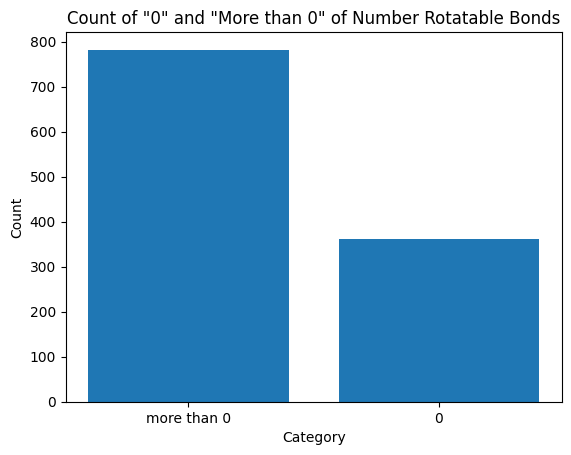

In [23]:
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of "0" and "More than 0" of Number Rotatable Bonds')

# Display the chart
plt.show()

## Data cleaning

for empty cells

In [ ]:
df.dropna(inplace = True)

print(df.to_string())

       MolLogP    MolWt  NumRotatableBonds  AromaticProportion    logS
0      2.59540  167.850                0.0            0.000000  -2.180
1      2.37650  133.405                0.0            0.000000  -2.000
2      2.59380  167.850                1.0            0.000000  -1.740
3      2.02890  133.405                1.0            0.000000  -1.480
4      2.91890  187.375                1.0            0.000000  -3.040
5      1.81000   98.960                0.0            0.000000  -1.290
6      1.93520   96.944                0.0            0.000000  -1.640
7      1.40540  118.176                4.0            0.000000  -0.430
8      4.30020  215.894                0.0            0.600000  -4.570
9      2.56540  132.206                0.0            0.600000  -4.370
10     4.30020  215.894                0.0            0.600000  -4.630
11     3.64680  181.449                0.0            0.666667  -4.000
12     2.61186  120.195                0.0            0.666667  -3.200
13    

for wrong format

In [ ]:
df['logS'] = pd.to_datetime(df['logS'])

print(df.to_string())

       MolLogP    MolWt  NumRotatableBonds  AromaticProportion                          logS
0      2.59540  167.850                0.0            0.000000 1969-12-31 23:59:59.999999998
1      2.37650  133.405                0.0            0.000000 1969-12-31 23:59:59.999999998
2      2.59380  167.850                1.0            0.000000 1969-12-31 23:59:59.999999999
3      2.02890  133.405                1.0            0.000000 1969-12-31 23:59:59.999999999
4      2.91890  187.375                1.0            0.000000 1969-12-31 23:59:59.999999997
5      1.81000   98.960                0.0            0.000000 1969-12-31 23:59:59.999999999
6      1.93520   96.944                0.0            0.000000 1969-12-31 23:59:59.999999999
7      1.40540  118.176                4.0            0.000000 1970-01-01 00:00:00.000000000
8      4.30020  215.894                0.0            0.600000 1969-12-31 23:59:59.999999996
9      2.56540  132.206                0.0            0.600000 1969-12

for wrong data

In [ ]:
df.loc[0,'logS'] = -2.18

print(df.to_string())

       MolLogP    MolWt  NumRotatableBonds  AromaticProportion                           logS
0      2.59540  167.850                0.0            0.000000                          -2.18
1      2.37650  133.405                0.0            0.000000  1969-12-31 23:59:59.999999998
2      2.59380  167.850                1.0            0.000000  1969-12-31 23:59:59.999999999
3      2.02890  133.405                1.0            0.000000  1969-12-31 23:59:59.999999999
4      2.91890  187.375                1.0            0.000000  1969-12-31 23:59:59.999999997
5      1.81000   98.960                0.0            0.000000  1969-12-31 23:59:59.999999999
6      1.93520   96.944                0.0            0.000000  1969-12-31 23:59:59.999999999
7      1.40540  118.176                4.0            0.000000            1970-01-01 00:00:00
8      4.30020  215.894                0.0            0.600000  1969-12-31 23:59:59.999999996
9      2.56540  132.206                0.0            0.6000

for duplicates

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1139    False
1140    False
1141    False
1142    False
1143    False
Length: 1144, dtype: bool

## EDA

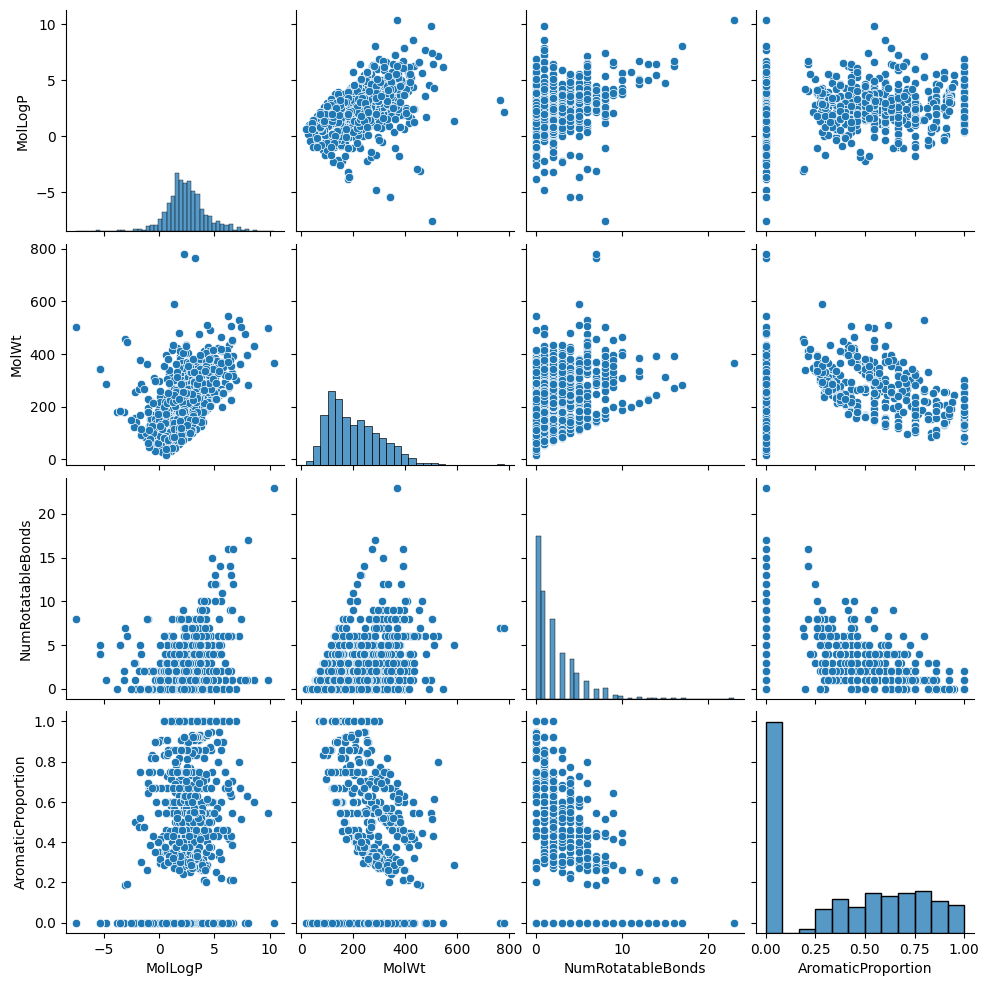

In [ ]:
import seaborn as sns
sns.pairplot(df)

<ipython-input-42-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

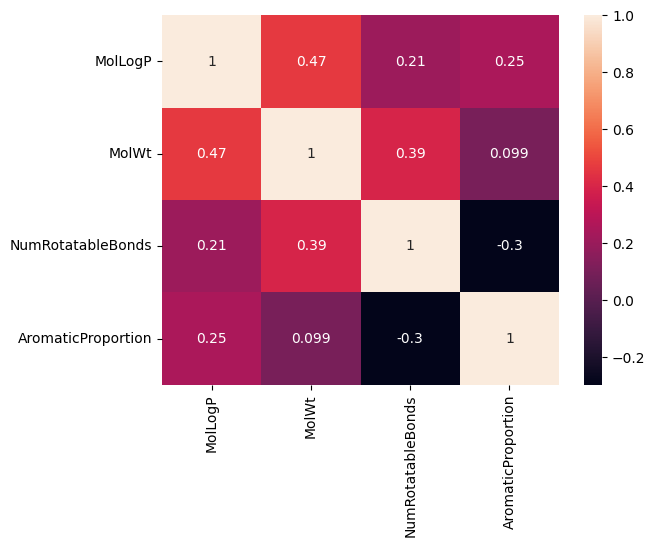

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

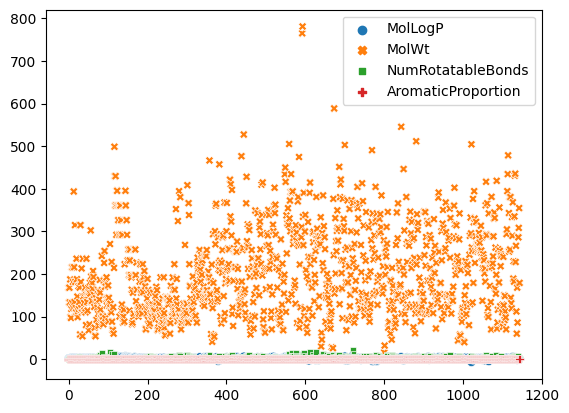

In [ ]:
sns.scatterplot(df)

## **Data preparation**

data separation as x and y

In [ ]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
x = df.drop("logS", axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## **Data splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)



In [ ]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [ ]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [ ]:
y_test

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

## **Model Building**

**Linear Regression**

Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Applying the model to make a prediction

In [ ]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [ ]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("LR MSE (train):" , lr_train_mse)
print("LR R2 (test):" , lr_train_r2)
print("LR MSE (train):" , lr_test_mse)
print("LR R2 (test):" , lr_test_r2)


LR MSE (train): 1.0075362951093687
LR R2 (test): 0.7645051774663391
LR MSE (train): 1.0206953660861033
LR R2 (test): 0.7891616188563282


In [ ]:
lr_results = pd.DataFrame(['LinearRegression' , lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162


**Random** **forest**

Training the model

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

Applying the model to make a prediction

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest' , rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Data Visualization of prediction results**

Text(0.5, 0, 'Experimental logS')

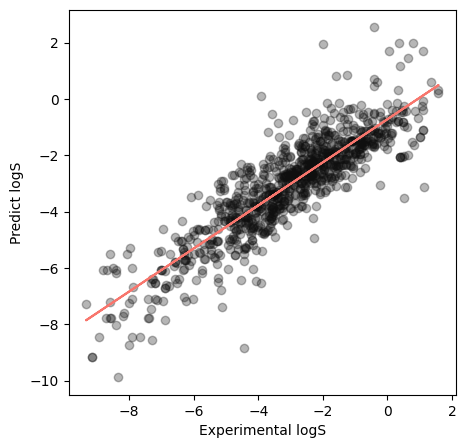

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c='#0f0f0f' , alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')